# Intro
This is a PyTorch Tutorial for UC Berkeley's CS285.
There's already a bunch of great tutorials that you might want to check out, and in particular [this tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).
This tutorial covers a lot of the same material. If you're familiar with PyTorch basics, you might want to skip ahead to the PyTorch Advanced section.

First, let's import some things and define a useful plotting function

In [4]:
#@title imports and define `plot`
import matplotlib.pyplot as plt
import torch
import numpy as np

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')
  
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

For GPU support, go to `Runtime > Change runtime type`.

# PyTorch Basic

## Tensors

Numpy arrays are objects that allow you to store and manipulation matrices.

In [5]:
shape = (2, 3)
x = np.zeros(shape)
y = np.ones(shape)
z = x + y
print(x)
print("+")
print(y)
print("=")
print(z)

[[0. 0. 0.]
 [0. 0. 0.]]
+
[[1. 1. 1.]
 [1. 1. 1.]]
=
[[1. 1. 1.]
 [1. 1. 1.]]


In [6]:
# print(z.sum())
print(z[0, 1:])

[1. 1.]


PyTorch is build around _tensors_, which play a similar role as numpy arrays. You can do many of the same operations in PyTorch:

In [7]:
x = torch.zeros(shape)
y = torch.ones(shape)
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
+
tensor([[1., 1., 1.],
        [1., 1., 1.]])
=
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Many functions have alternate syntax that accomplish the same thing

In [8]:
torch.add(x, y)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
z.min()

tensor(1.)

In [10]:
z[1:, 0]

tensor([1.])

In [11]:
torch.sum(z)

tensor(6.)

Function that reduce dimenions will by default reduce all dimensions unless a dimension is specified

In [12]:
torch.sum(z, dim=1)

tensor([3., 3.])

In [13]:
torch.sum(z, dim=0)

tensor([2., 2., 2.])

Like numpy, pytorch will try to broadcast operations

In [14]:
x = torch.ones((3, 1))
y = torch.ones((1, 3))
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[1.],
        [1.],
        [1.]])
+
tensor([[1., 1., 1.]])
=
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


Operations that end with an underscore denote in-place functions. Use these sparingly as they easily lead to bugs.

In [15]:
print(z)
z.zero_()
print(z)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [16]:
z.add_(5)
print(z)

tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]])


### Moving between numpy and PyTorch

In [46]:
x_np = np.random.randn(3,2,4)
print(x_np)

[[[ 0.02222857 -0.98373457  0.89597194  0.59514966]
  [ 0.28770108 -0.33827953  0.05544195  0.2104092 ]]

 [[-0.166102   -0.42115955 -0.47166849 -0.06234568]
  [ 0.50721528 -0.74923156  0.36231422 -2.02108458]]

 [[-0.516134    0.70809667  2.14771877 -0.03131667]
  [ 0.09333847  0.83130934  0.26354267  0.03159759]]]


numpy -> pytorch is easy

In [47]:
x = torch.from_numpy(x_np)
print(x)

tensor([[[ 0.0222, -0.9837,  0.8960,  0.5951],
         [ 0.2877, -0.3383,  0.0554,  0.2104]],

        [[-0.1661, -0.4212, -0.4717, -0.0623],
         [ 0.5072, -0.7492,  0.3623, -2.0211]],

        [[-0.5161,  0.7081,  2.1477, -0.0313],
         [ 0.0933,  0.8313,  0.2635,  0.0316]]], dtype=torch.float64)


By default, numpy arrays are float64. You'll probably want to convert arrays to float32, as most tensors in pytorch are float32.

In [19]:
x = torch.from_numpy(x_np).to(torch.float32)
print(x)

tensor([[-0.9208, -1.2725,  0.4922],
        [-1.0813, -0.9124,  0.9050]])


pytorch -> numpy is also easy

In [20]:
print(x.numpy())

[[-0.92079955 -1.2725363   0.49217486]
 [-1.0813323  -0.91243386  0.9050194 ]]


### GPU support

In [21]:
torch.cuda.is_available()

True

The code below errors out because both tensors need to be on the same device.

In [25]:
device = torch.device("cuda")
x = torch.zeros(shape)
y = torch.ones(shape, device=device)
z = x + y

RuntimeError: expected device cpu but got device cuda:0

You can move a tensor to the GPU by using the `to` function.

In [26]:
x = x.to(device)
z = x + y
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


This code also errors out, because you can't convert tensors on a GPU into numpy arrays directly.

In [27]:
z.numpy()

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

First you need to move them to the CPU.

In [28]:
z_cpu = z.to('cpu')
z_cpu.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

### (homework aside)

In [29]:
from cs285.infrastructure import pytorch_util as ptu
ptu.from_numpy(x_np)
ptu.to_numpy(x)

ModuleNotFoundError: No module named 'cs285'

## Neural-Network specific functions
PyTorch has a bunch of built-in funcitons.
See [the docs](https://pytorch.org/docs/stable/torch.html) for a full list.

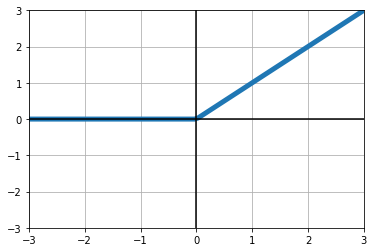

In [30]:
xs = torch.linspace(-3, 3, 100)
ys = torch.relu(xs)
plot(xs.numpy(), ys.numpy())

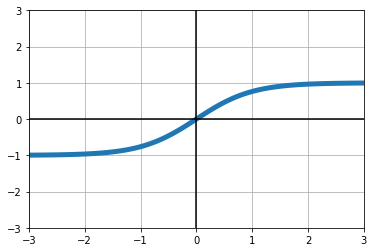

In [31]:
xs = torch.linspace(-3, 3, 100)
ys = torch.tanh(xs)
plot(xs.numpy(), ys.numpy())

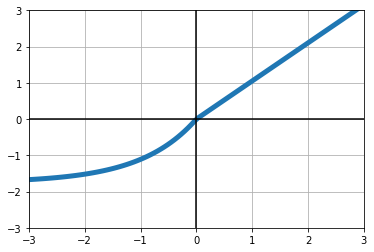

In [32]:
xs = torch.linspace(-3, 3, 100)
ys = torch.selu(xs)
plot(xs.numpy(), ys.numpy())

## Automatic differentiation

Given some loss function
$$L(\vec x, \vec y) = ||2 \vec x + \vec y||_2^2$$
we want to evaluate
$$\frac{\partial L}{\partial \vec x}$$
and
$$\frac{\partial L}{\partial \vec y}$$

In [33]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape, requires_grad=True)

PyTorch makes this easy by having tensors keep track of their data...

In [34]:
x.data

tensor([1., 2., 3.])

...and their gradient:

In [35]:
print(x.grad)

None


However, right now `x` has no gradient because it does not know what loss it must be differentiated with respect to.
Below, we define the loss.

In [36]:
loss = ((2 * x + y)**2).sum()
print(loss)

tensor(83., grad_fn=<SumBackward0>)


And we perform back-propagation by calling `backward` on it.

In [37]:
loss.backward()

Now we see that the gradients are populated!

In [38]:
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])


### gradients accumulate
Gradients accumulate, os if you call backwards twice...

In [39]:
loss = ((2 * x + y)**2).sum()
loss.backward()

...you'll get twice the gradient.

In [40]:
print(x.grad)
print(y.grad)

tensor([24., 40., 56.])
tensor([12., 20., 28.])


### multiple losses

This accumulation makes it easy to add gradients from different losses, which might not even use the same parameters. For example, this loss is only a function of `x`....

In [ ]:
other_loss = (x**2).sum()
other_loss.backward()

...and so only `x.grad` changes.

In [ ]:
print(x.grad)
print(y.grad)

### stopping and starting gradients

If you don't specify `required_grad=True`, the gradient will always be `None`.

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape)
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

You can turn `required_grad` back on after initializing a tensor.

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape)
y.requires_grad = True
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

You can cut a gradient by calling `y.detach()`, which will return a new tensor with `required_grad=False`. Note that `detach` is not an in-place operation!

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape, requires_grad=True)
# y_detached = y.detach()
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape, requires_grad=True)
z = 2 * x
z.required_grad = True
loss = ((2 * z + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

In [ ]:
z.grad

In [ ]:
torch.from_numpy(np.array([1,2]))

Any difference between p.data.add_(-0.001 + p.grad) and p.data+= -0.001 + p.grad?

## Modules
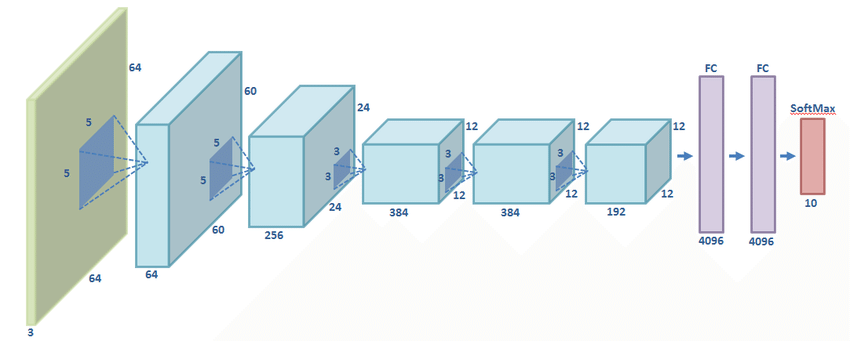

`nn.Modules` represent the building blocks of a computation graph.
For example, in typical pytorch code, each convolution block above is its own module, each fully connected block is a module, and the whole network itself is also a module.
Modules can contain modules within them.
All the classes inside of `torch.nn` are instances `nn.Modules`.
Below is an example definition of a module:

In [ ]:
import pdb

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        pdb.set_trace()
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def hook(self, gradient):
      return 2*gradient

The main function that you need to implement is the `forward` function.
Otherwise, it's a normal Python object:

In [ ]:
net = Net(input_size=1, output_size=1)
print(net)

Here we create some dummy input. The first dimension will be the batch dimension.

In [ ]:
x = torch.linspace(-5, 5, 100).view(100, 1)
print(x.shape)

To evaluate a neural network on some input, you pass an input through a module by calling it directly. In particular, don't call `net.forward(x)`.

In [ ]:
y = net(x)
print(y.shape)

Let's visualize what the networks looks like.

In [ ]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

The network keeps track of all the parameters and gradients!

In [ ]:
print(net.fc1.bias.grad)

In the `__init__` function, any variable that you assign to `self` that is also a module will be automatically added as a sub-module. The parameters of a module (and all sub-modules) can be accessed through the `parameters()` function:

In [ ]:
for p in net.parameters():
  print(p.shape)

WARNING: if you want to have a list of modules use
```
def __init__(self, network1, network2):
  self.list = nn.ModuleList([network1, network 2])
```
and **not** 
```
def __init__(self, network1, network2):
  self.list = [network1, network 2]
```
In the later case, `network1` and `network2` won't be added as sub-modules.

The output of the module is just a tensor. We can perform operations on the tensor like before to automatically compute derivatives.
For example, below, we minimize the sum-of-squares of the output.

In [ ]:
loss = (y**2).sum()
loss.backward()

We can manually update the parameters by adding the gradient (times a negative learning rate) and zero'ing out the gradients to prevent gradient accumulation.

In [ ]:
for p in net.parameters():
  p.data.add_(-0.001 * p.grad)
  p.grad.data.zero_()

And we can do this in a loop to train our network!

In [ ]:
for _ in range(100):
  y = net(x)
  loss = (y**2).sum()
  loss.backward()
  for p in net.parameters():
    p.data.add_(- 0.001 * p.grad)
    p.grad.data.zero_()

Sure enough, our network learns to set everything to zero.

In [ ]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

## Loss Functions
PyTorch has a bunch of built in loss functions, which are just other modules that you can pass your data through.

In [ ]:
y_target = torch.sin(x)
loss_fn = nn.SmoothL1Loss()

In [ ]:
for _ in range(1000):
  y = net(x)
  loss = loss_fn(y, y_target)
  loss.backward()
  for p in net.parameters():
    p.data.add_(- 0.001 * p.grad)
    p.grad.data.zero_()

In [ ]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

## Optimizers

We can use more fancy optimizers with the `optim` package.

In [ ]:
from torch import optim

net = Net(input_size=1, output_size=1)

optimizer = optim.Adam(net.parameters(), lr=1e-3)

x = torch.linspace(-5, 5, 100).view(-1, 1)
y = net(x)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()

Here's the network before training

In [ ]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

and here's how you can use the optimize to train the network.
Note that we call `zero_grad` _before_ calling `loss.backward()`, and then we just call `optimizer.step()`. This `step` function will take care of updating all the parameters that were passed to that optimizer's constructor.

In [ ]:
for _ in range(100):
  y = net(x)
  loss = loss_fn(y, y_target)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

And we see that this trained a network quite well

In [ ]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

## Regression example

We're going to train two separate neural networks to solve a prediction task:
$$f_\theta(x) \approx y$$
First we generate the data

In [ ]:
N = 100
d = 1
X = np.random.randn(N, 1)
Y = X * 2 + 3 + np.random.randn(N, 1)
plt.scatter(X, Y)

In [ ]:
print(X.shape, Y.shape)

Next we convert that data to pytorch

In [ ]:
X_pt = torch.from_numpy(X).to(torch.float32)
Y_pt = torch.from_numpy(Y).to(torch.float32)

loss_fn = nn.MSELoss()

Define the training loop

In [ ]:
def train(net: nn.Module):
  optimizer = optim.SGD(net.parameters(), lr=1e-2)
  losses = []
  for _  in range(100):
    Y_hat_pt = net(X_pt)
    loss = loss_fn(Y_hat_pt, Y_pt) 
  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    losses.append(loss.detach().numpy())
  return np.array(losses)

Let's test two different networks

In [ ]:
linear_network = nn.Linear(1, 1)
linear_losses = train(linear_network)

non_linear_network = Net(1, 1)
non_linear_losses = train(non_linear_network)

and plot the losses and predictions.

In [ ]:
plt.figure()
t = np.arange(len(linear_losses))
plt.plot(t, linear_losses, t, non_linear_losses)
plt.legend(['linear', 'non_linear'])

In [ ]:
x_probe = torch.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_lin = linear_network(x_probe).detach().numpy()
y_non_lin = non_linear_network(x_probe).detach().numpy()

plt.scatter(x_probe.numpy(), y_lin, s=3)
plt.scatter(x_probe.numpy(), y_non_lin, s=3)
plt.scatter(X, Y)
plt.legend(['linear', 'non_linear', 'data'])

# PyTorch - Advanced

## Distributions
PyTorch has a very convenient [distributions](https://pytorch.org/docs/stable/distributions.html) package.

In [ ]:
from torch import distributions

You create distributions by passing the parameters of the distribution.

In [ ]:
mean = torch.zeros(1, requires_grad=True)
std = torch.ones(1, requires_grad=True)
gaussian = distributions.Normal(mean, std)

These distributions are instances of the more general `Distribution` class, which you can read more about [here](https://pytorch.org/docs/stable/distributions.html#distribution).

In [ ]:
print(gaussian)
print(isinstance(gaussian, distributions.Distribution))

In [ ]:
sample = gaussian.sample((1,))
print(sample)

In [ ]:
gaussian.log_prob(sample)

The log probability depends on the the parameters of the distribution. So, calling `backward` on a loss that depends on `log_prob` will back-propagate gradients into the parmaeters of the distribution.

NOTE: this won't back-propagate through the samples (the "reparatermization trick''), unless you use `rsample`, which is only implemented for some distributions.

at 5:18, we can set loss to -log_prob to maximize the probability of an event. That makes sense to me because the higher prob is, the smaller loss would be. Now if we want to incorporate reward into this loss function, i think usually people do loss=-log_prob*reward? but that means the higher the reward is, the higher the loss is. Is this because we want to push the prob of the event to be higher with a higher loss when we have a higher reward? or should we have lower loss with higher reward (loss=log_prob*reward)?

$$s_1, a_1, s_2, a_2, ...$$

In [ ]:
loss = - gaussian.log_prob(sample).sum()

In [ ]:
loss.backward()

In [ ]:
mean.grad

## Batch-Wise distribution

The distributions also support batch-operations. In this case, all the operations (`sample`, `log_prob`, etc.) are batch-wise.

In [ ]:
mean = torch.zeros(10)
std = torch.ones(10)
gaussian = distributions.Normal(mean, std)

In [ ]:
gaussian

In [ ]:
sample = gaussian.sample((1,))
print(sample)

In [ ]:
gaussian.log_prob(sample)

## Multivariate Normal

There are other distributions

In [ ]:
mean = torch.zeros(2)
covariance = torch.tensor(
    [[1, 0.8],
     [0.8, 1]]
)
gaussian = distributions.MultivariateNormal(mean, covariance)

In [ ]:
gaussian.sample((1,))

In [ ]:
samples = gaussian.sample((500,))
plt.scatter(samples[:, 0].numpy(), samples[:, 1].numpy())

NOTE: if you want to use a batch of `MultivariateNormal` distributions, you'll need to construct a batch of covariance matrices (i.e. shape `[BATCH_SIZE, DIM, DIM]`).

## Categorical Distribution

In [ ]:
from torch import distributions

Another useful distribution is the categorical distribution.

In [ ]:
probs = torch.tensor([0.1, 0.2, 0.7])
dist = distributions.Categorical(probs=probs)

In [ ]:
sample = dist.sample([20])
print(sample)

In [ ]:
dist.log_prob(sample)

## Distributions and Modules

Typically, your network will output parameters of a distribution

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
mean_network = Net(1, 1)
x = torch.randn(100, 1)
mean = mean_network(x)
distribution = distributions.Normal(x, scale=1)

If you want, your nn.Module can return a distribution in the `forward` function!

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return distributions.Normal(x, scale=1)

In [ ]:
distribution_network = Net(1, 1)
x = torch.randn(100, 1)
distribution = distribution_network(x)

## `gather`
This function will be useful for the DQN assignment.
It allows you to index into arrays in a batch.

In [ ]:
x = torch.arange(6).reshape(2, 3)
y = torch.tensor([0, 1]).reshape(2, 1)
print(x)
print(y)
print(torch.gather(x, 0, y))

In [ ]:
x = torch.arange(6).reshape(2, 3)
y = torch.tensor([0, 1, 0]).reshape(1, 3)
print(x)
print(y)
print(torch.gather(x, 0, y))

For a 3-D tensor the output is specified by::

    out[i][j][k] = input[index[i][j][k]][j][k]  # if dim == 0
    out[i][j][k] = input[i][index[i][j][k]][k]  # if dim == 1
    out[i][j][k] = input[i][j][index[i][j][k]]  # if dim == 2